In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "axes.titlesize": 24,        # Larger axes/title fonts
        "axes.labelsize": 24,
        "xtick.labelsize": 24,
        "ytick.labelsize": 20,
        "legend.fontsize": 24,
    }
)
sns.set_context("talk")


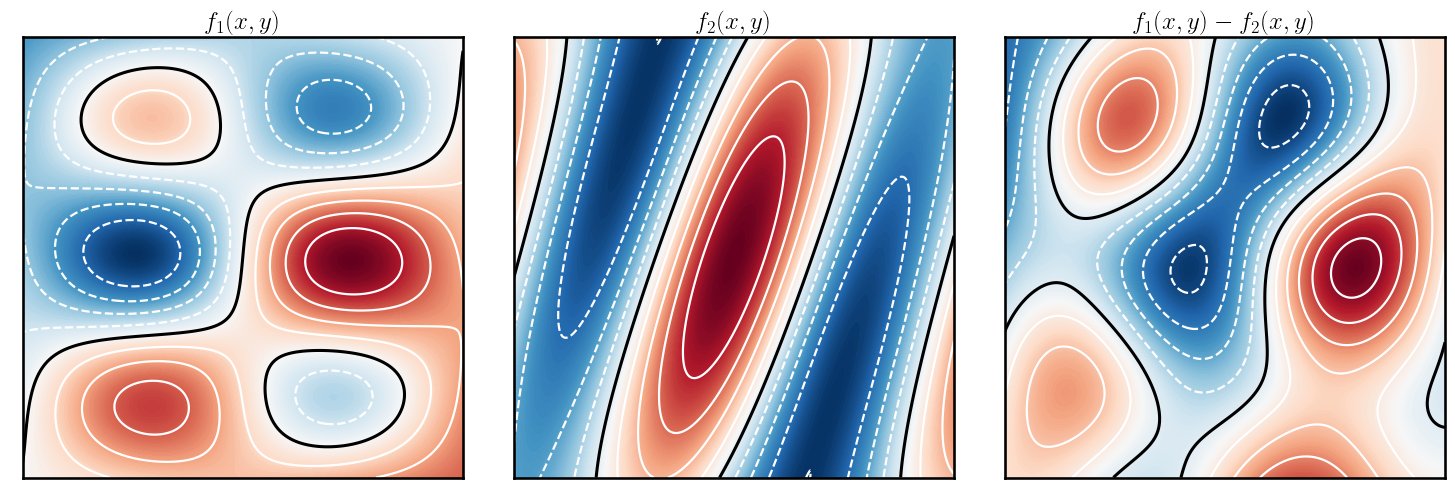

In [13]:
n = 500
x = np.linspace(-1.5, 1.5, n)
y = np.linspace(-1.5, 1.5, n)
X, Y = np.meshgrid(x, y)

# Functions from before
f1 = np.exp(-0.3*(X**2+Y**2)) * np.sin(2*X) * np.cos(3*Y) + 0.2*(X - Y)
f2 = np.exp(-0.2*(X**2+Y**2)) * np.cos(3*X - Y) + 0.1*(X**2 - Y**2)
f3 = f1 - f2

fig, axs = plt.subplots(1, 3, figsize=(15,5))

for ax, f, title in zip(axs, [f1,f2,f3], [r"$f_1(x,y)$", r"$f_2(x,y)$", r"$f_1(x,y)-f_2(x,y)$"]):
    # Dense shading
    ax.contourf(X, Y, f, levels=200, cmap="RdBu_r")
    # Fewer, continuous white contour lines
    ax.contour(X, Y, f, levels=10, colors="white", linewidths=1.6)
    # Emphasize zero contour
    ax.contour(X, Y, f, levels=[0], colors="black", linewidths=2.2)

    ax.set_title(title)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_aspect("equal")

plt.tight_layout()
plt.savefig("real_analytic_fns.png")
plt.show()


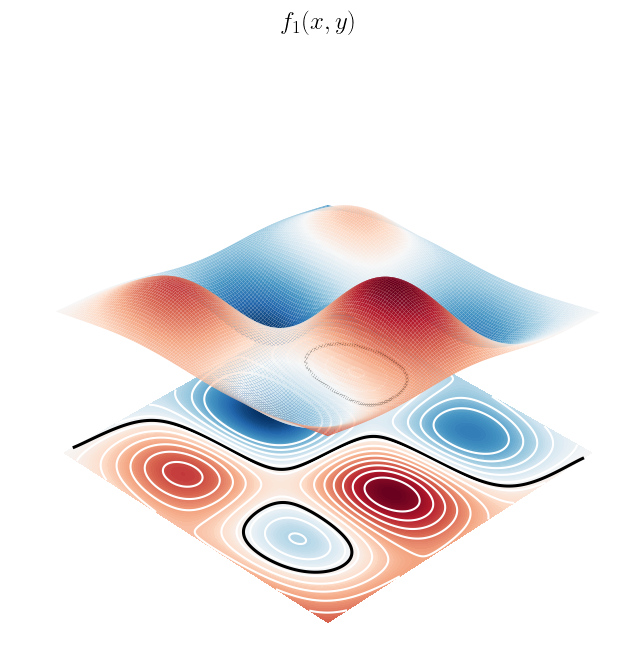

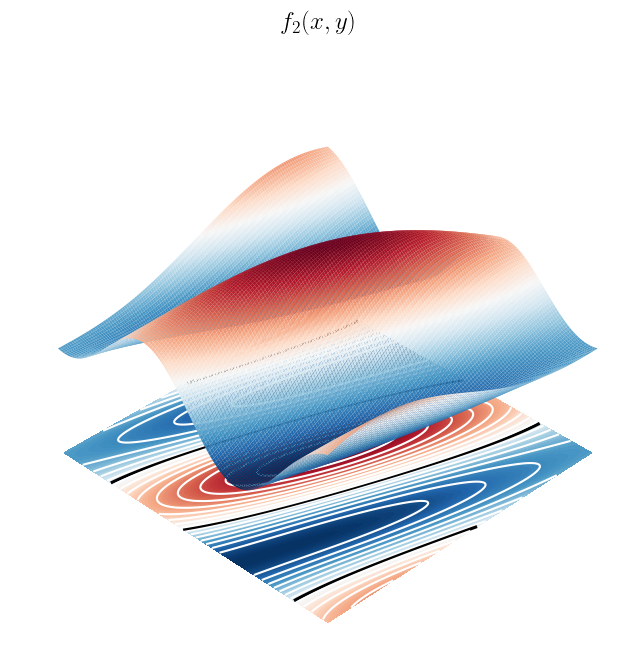

('f1_surface_projection.pdf', 'f2_surface_projection.pdf')

In [ ]:
# 3D surfaces whose top-down 2D projections reproduce the earlier contour style.
# - Surface: z = f(x,y)
# - Base plane projection: filled RdBu_r + white contours + bold black zero contour

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Domain
n = 400
x = np.linspace(-1.5, 1.5, n)
y = np.linspace(-1.5, 1.5, n)
X, Y = np.meshgrid(x, y)

# Functions (as defined before)
f1 = np.exp(-0.3*(X**2+Y**2)) * np.sin(2*X) * np.cos(3*Y) + 0.2*(X - Y)
f2 = np.exp(-0.2*(X**2+Y**2)) * np.cos(3*X - Y) + 0.1*(X**2 - Y**2)

def surface_with_projection(Z, title, outpath, gap=0.6, elev=35, azim=-45):
    zmin = float(Z.min())
    zmax = float(Z.max())
    dz   = max(zmax - zmin, 1e-9)

    # ↓ bigger 'gap' ⇒ larger distance between surface and projection
    base = zmin - gap * dz

    levels_filled = np.linspace(zmin, zmax, 120)
    levels_lines  = np.linspace(zmin, zmax, 18)

    fig = plt.figure(figsize=(9,7))
    ax = fig.add_subplot(111, projection='3d')

    # remove axes
    ax.set_axis_off()

    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=0,
                    antialiased=True, cmap="RdBu_r")

    ax.contourf(X, Y, Z, zdir='z', offset=base, levels=levels_filled, cmap="RdBu_r")
    ax.contour( X, Y, Z, zdir='z', offset=base, levels=levels_lines,
                colors='white', linewidths=1.5, linestyles='solid')
    ax.contour( X, Y, Z, zdir='z', offset=base, levels=[0],
                colors='black', linewidths=2.2)

    ax.set_title(title)

    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(base, zmax + 0.2*dz)     # ensure the base isn’t clipped
    # ax.set_box_aspect((1, 1, 0.8))       # optional: tweak vertical scaling
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    ax.view_init(elev=elev, azim=azim)
    fig.tight_layout()

    fig.savefig(outpath, dpi=300, bbox_inches='tight')
    plt.show()
    return outpath

p1 = surface_with_projection(f1, r"$f_1(x,y)$", "figures/f1_surface_projection.pdf")
p2 = surface_with_projection(f2, r"$f_2(x,y)$", "figures/f2_surface_projection.pdf")
p3 = surface_with_projection(f1-f2, r"$f_1 - f_2$", "figures/f_diff_surface_projection.pdf")

(p1, p2, p3)
